# Oceanography Python Tutorial

## Exercice 1. Reading Data with Python

First exercise is trying to read netcdf file

To do it you can check: `read netcdf with python` in google

> Hint: Use: https://unidata.github.io/netcdf4-python/#quick-install

In [13]:
import netCDF4
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
file2read = netCDF4.Dataset('EA_R12_test10_1m_20130201_20131231_grid_T_extracted.nc','r')

In [11]:
file2read

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: EA_R12_test10_1m_20130201_20131231_grid_T
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2021-Jul-16 12:28:33 GMT
    uuid: 2f0382ff-8214-4f68-8052-821fe8d9b7bf
    ibegin: 0
    ni: 57
    jbegin: 0
    nj: 31
    file_name: /work/n01/n01/valegu/EA_R12/nemo_v4.06/cfgs/EAFRICA/EXP_R12/EA_R12_test10_1m_20130201_20131231_grid_T.nc
    TimeStamp: 19/07/2021 12:19:25 +0100
    history: Mon Jul 19 14:10:45 2021: ncks -C -v thetao,so,nav_lat,nav_lon EA_R12_test10_1m_20130201_20131231_grid_T.nc out.nc
    NCO: netCDF Operators version 4.9.6-alpha03 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): y(124), x(57), time_counter(10), deptht(75)
    variables(dimensions): float32 nav_lat(y, x), float32 nav_lon(y, x), float32 so(time_counter, deptht, y, x), float32 thetao(time_counter, deptht, y, x)
  

In [12]:

print(file2read.variables["nav_lat"][:])

[[-11.505225  -11.505225  -11.505225  ... -11.505225  -11.505225
  -11.505225 ]
 [-11.423554  -11.423554  -11.423554  ... -11.423554  -11.423554
  -11.423554 ]
 [-11.34186   -11.34186   -11.34186   ... -11.34186   -11.34186
  -11.34186  ]
 ...
 [ -1.         -1.         -1.        ...  -1.4998287  -1.4998287
   -1.4998287]
 [ -1.         -1.         -1.        ...  -1.4165224  -1.4165224
   -1.4165224]
 [ -1.         -1.         -1.        ...  -1.333213   -1.333213
   -1.333213 ]]


## Exercice 1bis. Select a data for a date and a depth

Return as a numpy array the data for the variable `so` or `thetao` for a given time_counter and depth.

To do that you will need to slice the data.

To slice a numpy array, you can use: `array[1, 1, :, :]` for selecting the first index for the first axis, the first index for the second axis, the whole 3rd and 4th axis.
    
To select data in a masked array, you can use `masked_array.mask_name` to select the `mask_name` from the `masked_array`

In [37]:
file2read.variables["thetao"][:]
A=file2read.variables["thetao"][:]
array = A.data[1,1,:,:]

## Exercice 2. installing plotting library in Python 

2nd exercice is to install plotting library in Python for doing visualisation

You can search plotting library in python with: `heatmap in python` in google

Two very common library is matplotlib and seaborn!

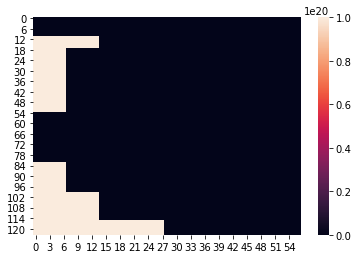

## Exercice 3. Importing Matplotlib and Seaborn

3rd exercice is to import the library matplotib and seaborn.

You can check the documentation to see how to do it!

In [ ]:
import seaborn as sns


## Exercice 4. Plot the data!

4th exercice is to use the imported library to plot either `so` or `thetao` variable!

You can check the documentation to see how to do it in the documentation of seaborn or google!


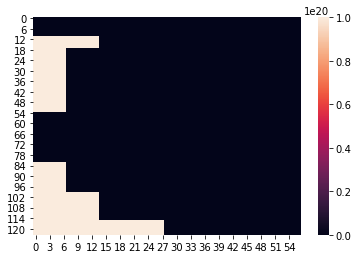

In [40]:
plot = sns.heatmap(array)

## Exercice 5. Clean the data to better sea the variation of value!

5th exercice is to remove the extreme value that is shrinking the scaling of color!

You can google how to remove 0 value in google !

> hint: Use https://stackoverflow.com/questions/39941128/dont-show-zero-values-on-2d-heat-map/39941795

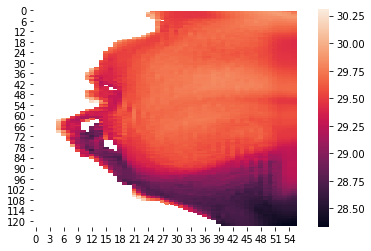

In [47]:
array[array == 0] = np.nan
array[array == 1e20] = np.nan
plot = sns.heatmap(array)

## Exercice 6. Calculate the difference between two time counter for thetao

This exercice you will be on your own

> Hint: Caution of dividing by 0!

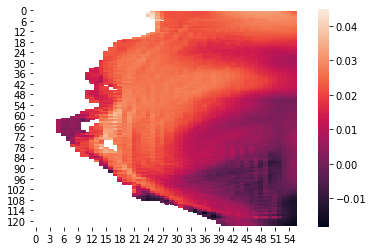

In [50]:
array2 = A.data[2,1,:,:]
Diff = (array -array2)/array
Diff
plot_Diff = sns.heatmap(Diff)

## Exercice 7. Make a loop to plot several `time_counter`

> Caution to the minimum and maximum variation of heatmap!


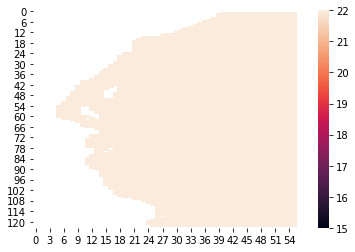

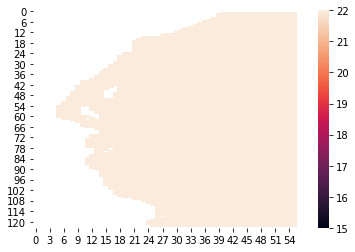

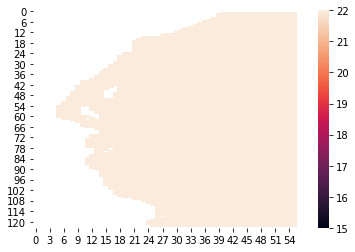

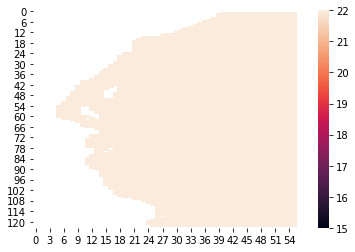

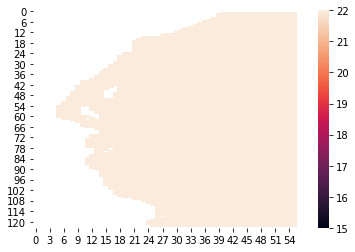

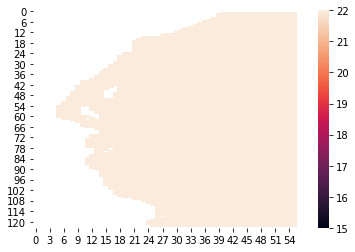

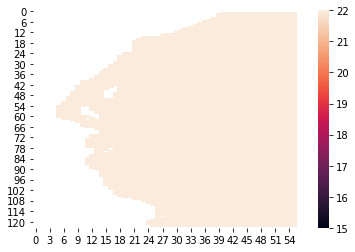

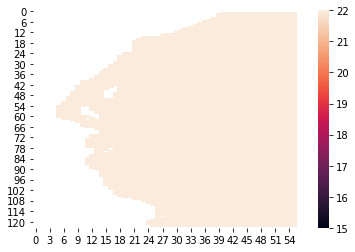

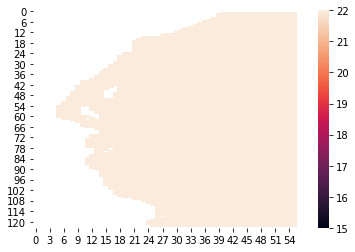

In [62]:
for x in range(1,10):
    
    valeur= A.data[5,x,:,:]  
    valeur[valeur == 0] = np.nan
    valeur[valeur == 1e20] = np.nan
    plt.figure()
    plot_valeur = sns.heatmap(np.flipud(valeur),vmin=15,vmax= 22)
    

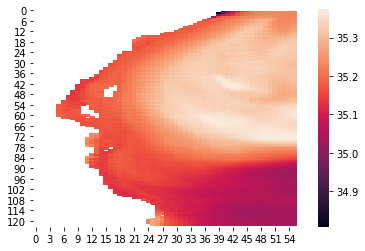

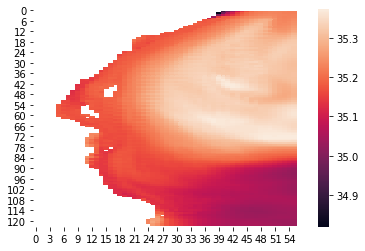

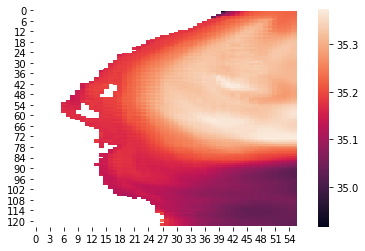

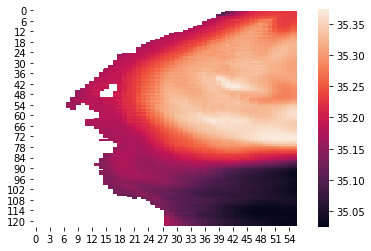

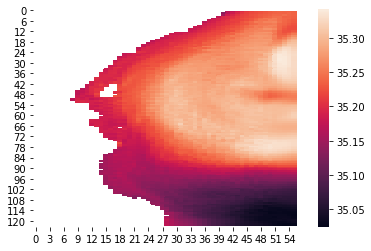

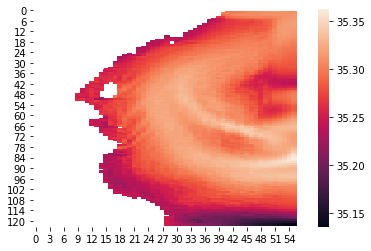

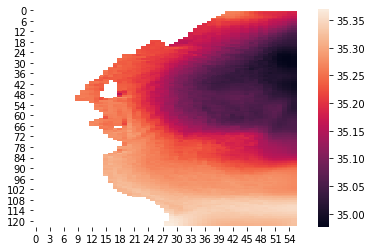

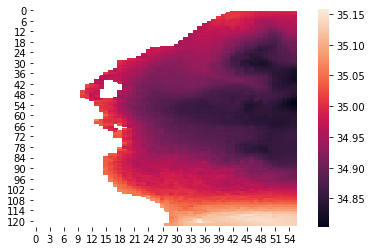

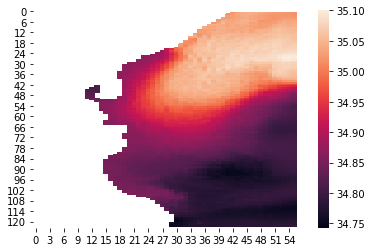

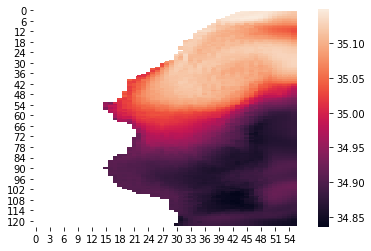

In [75]:
for x in range(1,50,5):
    SAL=file2read.variables["so"][:]
    B= my_function(SAL.data[5,x,:,:])
    plt.figure()
    plot_valeur = sns.heatmap(np.flipud(B))

## Exercice 7. Make a function to clean arrays with zeros and 1e20


Create a function that take an array as an input and output an array with np.nan where there is zeroes and 1e20!

In [66]:
def function(x,y):
    x=25
    a= x-y
    return a
function(9,2)

23

In [67]:
def my_function(array):
    array[array == 0] = np.nan
    array[array == 1e20] = np.nan
    return array

my_function(A.data[1,1,:,:])

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ..., 29.717688, 29.695187,
              nan],
       [      nan,       nan,       nan, ..., 29.8666  , 29.76334 ,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 28.382761, 28.354551,
              nan],
       [      nan,       nan,       nan, ..., 28.33424 , 28.333214,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)